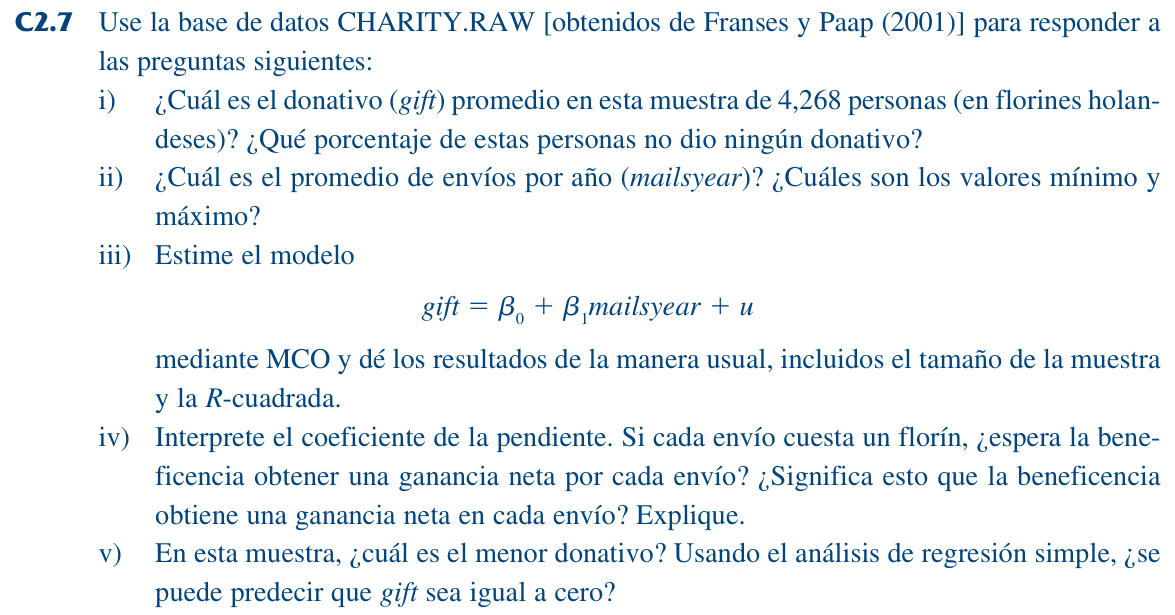

In [ ]:
import wooldridge as wd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos CHARITY.RAW
data = wd.data('charity')
data.head()

,respond,gift,resplast,weekslast,propresp,mailsyear,giftlast,avggift
0,0,0,0,143.000000,0.3,2.5,10,10.0
1,0,0,0,65.428574,0.3,2.5,10,10.0
2,0,0,1,13.142858,0.3,2.5,10,10.0
3,0,0,0,120.142860,0.3,2.5,10,10.0
4,1,10,0,103.857140,0.2,2.5,10,10.0


In [ ]:
# i) Promedio de donativo (gift) y porcentaje de personas que no dieron donativo
gift_promedio = data['gift'].mean()
porcentaje_no_donativo = (data['gift'] == 0).mean() * 100

print(f"Donativo promedio (gift): {gift_promedio:.2f} florines")
print(f"Porcentaje de personas que no dieron donativo: {porcentaje_no_donativo:.2f}%")

Donativo promedio (gift): 7.44 florines
Porcentaje de personas que no dieron donativo: 60.00%


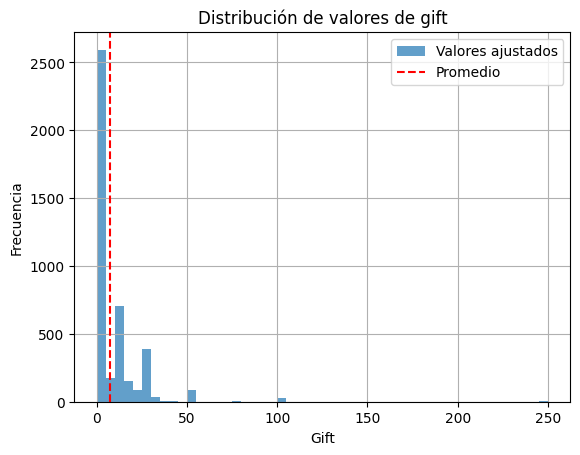

In [ ]:
plt.hist(data['gift'], bins=50, alpha=0.7, label='Valores ajustados')
plt.axvline(gift_promedio, color='r', linestyle='--', label='Promedio')
plt.title('Distribución de valores de gift')
plt.xlabel('Gift')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ii) Promedio, mínimo y máximo de envíos por año (mailsyear)
mails_promedio = data['mailsyear'].mean()
mails_min = data['mailsyear'].min()
mails_max = data['mailsyear'].max()

print(f"Promedio de envíos por año (mailsyear): {mails_promedio:.2f}")
print(f"Valor mínimo de mailsyear: {mails_min}")
print(f"Valor máximo de mailsyear: {mails_max}")

Promedio de envíos por año (mailsyear): 2.05
Valor mínimo de mailsyear: 0.25
Valor máximo de mailsyear: 3.5


In [ ]:
# iii) Modelo: gift ~ mailsyear
model = smf.ols('gift ~ mailsyear', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     59.65
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           1.40e-14
Time:                        17:37:35   Log-Likelihood:                -17602.
No. Observations:                4268   AIC:                         3.521e+04
Df Residuals:                    4266   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0141      0.739      2.724      0.0

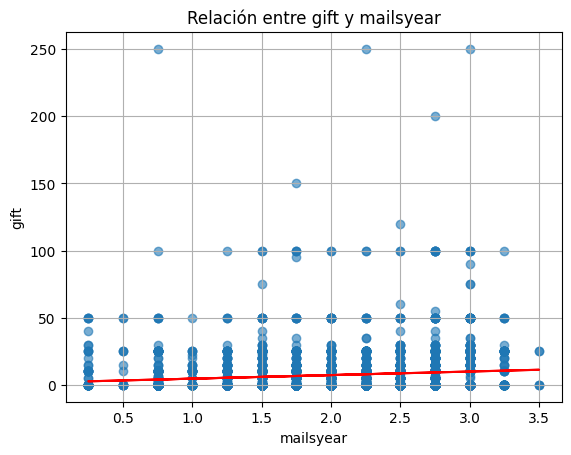

In [ ]:
data['fit_gift'] = model.fittedvalues
plt.scatter(data['mailsyear'], data['gift'], alpha=0.6)
plt.plot(data['mailsyear'], data['fit_gift'], c='red')
plt.title('Relación entre gift y mailsyear')
plt.xlabel('mailsyear')
plt.ylabel('gift')
plt.grid(True)
plt.show()

In [ ]:
# iv) Interpretación del coeficiente de pendiente
beta_1 = model.params['mailsyear']
print(f"Coeficiente de pendiente (beta_1): {beta_1:.4f}")

# Evaluar ganancia neta
ganancia_neta = beta_1 - 1
if ganancia_neta > 0:
    print(f"La beneficencia obtiene una ganancia neta de {ganancia_neta:.2f} florines por envío.")
else:
    print(f"La beneficencia no obtiene una ganancia neta por cada envío (pérdida de {-ganancia_neta:.2f} florines).")

Coeficiente de pendiente (beta_1): 2.6495
La beneficencia obtiene una ganancia neta de 1.65 florines por envío.


In [ ]:
# v) Menor donativo y predicción de gift igual a cero
gift_min = data['gift'].min()
print(f"El menor donativo en la muestra es: {gift_min:.2f} florines")

# Evaluar predicción de gift = 0
mailsyear_for_zero = -model.params['Intercept'] / beta_1
print(f"Según el modelo, gift se predice igual a 0 cuando mailsyear = {mailsyear_for_zero:.2f}")

El menor donativo en la muestra es: 0.00 florines
Según el modelo, gift se predice igual a 0 cuando mailsyear = -0.76
